In [1]:
import pandas as pd, geopandas as gpd
import requests
url = 'https://data.texas.gov/download/cuc7-ywmd/text%2Fplain'
import matplotlib.pyplot as plt

In [2]:
def bus_json_parser(bus):
    temp = bus.split('{\n  id: "')
    if len(temp) > 1:
        temp_list = temp[1].split('"\n')
        vehicle_id = temp_list[0]
    else: vehicle_id = ""
    temp = bus.split('route_id: "')
    if len(temp) > 1:
        temp_list = temp[1].split('"\n')
        route_id = temp_list[0]
    else: route_id =""
    temp = bus.split('latitude: ')
    if len(temp) > 1:
        temp_list = temp[1].split('\n')
        latitude = temp_list[0]
    else: latitude="30.257549554507065"
    temp = bus.split('longitude: ')
    if len(temp) > 1:
        temp_list = temp[1].split('\n')
        longitude = temp_list[0]
    else: longitude="-97.70811946245841"
    temp = bus.split('speed: ')
    if len(temp) > 1:
        temp_list = temp[1].split('\n')
        speed = temp_list[0]
    else: speed=""
    temp = bus.split('current_status: ')
    if len(temp) > 1:
        temp_list = temp[1].split('\n')
        current_status = temp_list[0]
    else: current_status=""
    temp = bus.split('stop_id: "')
    if len(temp) > 1:
        temp_list = temp[1].split('"\n')
        stop_id = temp_list[0]
    else: stop_id = ""
    return [vehicle_id, route_id, latitude, longitude, speed, current_status, stop_id]

In [3]:
def update_map():
    bus_df = pd.DataFrame(columns=['vehicle_id', 'route_id','latitude','longitude', 'speed','current_status','stop_id'])
    bus_json = requests.get(url).text
    bus_list = bus_json.split('\nentity ')[1:]
    for bus in bus_list:
        new_row = pd.DataFrame(columns=['vehicle_id', 'route_id','latitude','longitude', 'speed','current_status','stop_id'], data=[bus_json_parser(bus)])
        bus_df = bus_df.append(new_row, ignore_index=True)
    bus_df = bus_df[bus_df['vehicle_id']!="9999"]
    bus_df['longitude'] = bus_df['longitude'].astype('double')
    bus_df['latitude'] = bus_df['latitude'].astype('double')
    geo_bus = gpd.GeoDataFrame(
        bus_df, geometry=gpd.points_from_xy(bus_df.longitude, bus_df.latitude))
    geo_bus.plot()
    
def map_route(bus_route_str):
    bus_df = pd.DataFrame(columns=['vehicle_id', 'route_id','latitude','longitude', 'speed','current_status','stop_id'])
    bus_json = requests.get(url).text
    bus_list = bus_json.split('\nentity ')[1:]
    for bus in bus_list:
        new_row = pd.DataFrame(columns=['vehicle_id', 'route_id','latitude','longitude', 'speed','current_status','stop_id'], data=[bus_json_parser(bus)])
        bus_df = bus_df.append(new_row, ignore_index=True)
    bus_df = bus_df[bus_df['route_id'] == bus_route_str]
    bus_df['longitude'] = bus_df['longitude'].astype('double')
    bus_df['latitude'] = bus_df['latitude'].astype('double')
    geo_bus = gpd.GeoDataFrame(
        bus_df, geometry=gpd.points_from_xy(bus_df.longitude, bus_df.latitude))
    geo_bus.plot()

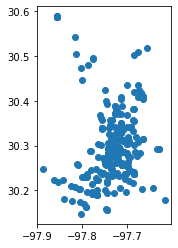

In [4]:
update_map()

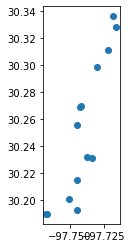

In [5]:
map_route("7")


<AxesSubplot:>

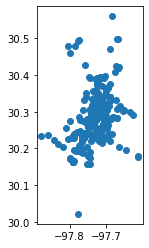

In [6]:
bus_df = pd.DataFrame(columns=['vehicle_id', 'route_id','latitude','longitude', 'speed','current_status','stop_id'])
bus_json = requests.get(url).text
bus_list = bus_json.split('\nentity ')[1:]
for bus in bus_list:
    new_row = pd.DataFrame(columns=['vehicle_id', 'route_id','latitude','longitude', 'speed','current_status','stop_id'], data=[bus_json_parser(bus)])
    bus_df = bus_df.append(new_row, ignore_index=True)
bus_df = bus_df[bus_df['vehicle_id']!="9999"]
bus_df['longitude'] = bus_df['longitude'].astype('double')
bus_df['latitude'] = bus_df['latitude'].astype('double')
geo_bus = gpd.GeoDataFrame(
    bus_df, geometry=gpd.points_from_xy(bus_df.longitude, bus_df.latitude))
geo_bus.plot()

In [52]:
geo_bus.to_file("bus.geojson", driver='GeoJSON')

In [7]:
bus_df.to_csv(r'test.csv')

In [18]:
bus_json = requests.get(url).text

In [26]:
gpd.read_file(r'C:\Users\benca\Downloads\vehiclepositions.json')

DriverError: 'C:\Users\benca\Downloads\vehiclepositions.json' not recognized as a supported file format.

In [53]:
print(bus_list[0])

{
  id: "2551"
  vehicle {
    trip {
      trip_id: "2500115_MRG_1"
      start_date: "20210328"
      route_id: "324"
    }
    position {
      latitude: 30.35654
      longitude: -97.73082
      bearing: 192.92651
      speed: 15.19936
    }
    current_stop_sequence: 32
    current_status: IN_TRANSIT_TO
    timestamp: 1616946567
    stop_id: "5849"
    vehicle {
      id: "2551"
      label: "2551"
    }
  }
}


In [59]:
bus_df.sort_values(by='stop_id').head(50)

,vehicle_id,route_id,latitude,longitude,speed,current_status,stop_id,geometry
61,104A,,30.375103,-97.722590,0.044704,,,POINT (-97.72259 30.37510)
47,102A,,30.375439,-97.722220,0.0,,,POINT (-97.72222 30.37544)
165,2864,,30.256090,-97.709440,0.0,,,POINT (-97.70944 30.25609)
96,5059,,30.375410,-97.724180,0.0,,,POINT (-97.72418 30.37541)
95,5057,,30.288889,-97.745120,2.503424,,,POINT (-97.74512 30.28889)
32,2231,,30.242530,-97.728780,11.801856,,,POINT (-97.72878 30.24253)
117,2709,,30.257970,-97.709540,0.0,,,POINT (-97.70954 30.25797)
60,104B,,30.375175,-97.722410,0.22352,,,POINT (-97.72241 30.37517)
25,2215,,30.242521,-97.735790,24.229568,,,POINT (-97.73579 30.24252)
24,2699,,30.324960,-97.739750,0.0,,,POINT (-97.73975 30.32496)
